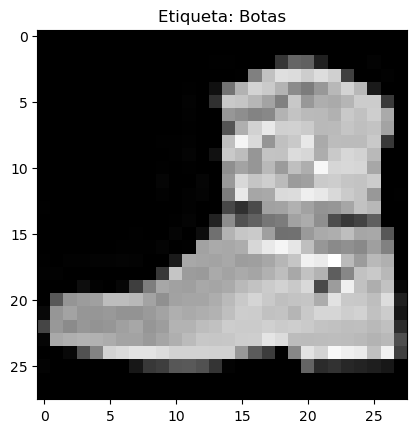

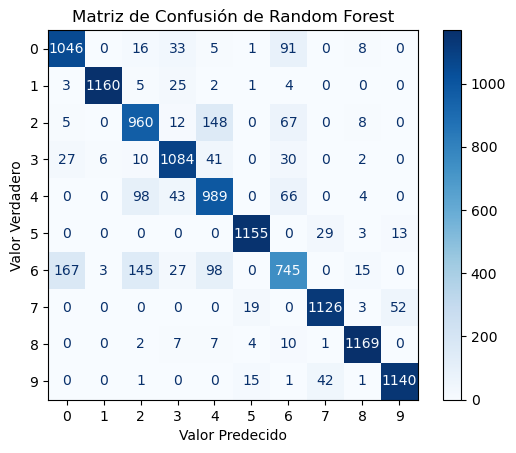

              precision    recall  f1-score   support

    Camiseta       0.84      0.87      0.85      1200
    Pantalon       0.99      0.97      0.98      1200
      Suéter       0.78      0.80      0.79      1200
     Vestido       0.88      0.90      0.89      1200
      Abrigo       0.77      0.82      0.79      1200
    Sandalía       0.97      0.96      0.96      1200
      Camisa       0.73      0.62      0.67      1200
  Zapatillas       0.94      0.94      0.94      1200
       Bolso       0.96      0.97      0.97      1200
       Botas       0.95      0.95      0.95      1200

    accuracy                           0.88     12000
   macro avg       0.88      0.88      0.88     12000
weighted avg       0.88      0.88      0.88     12000



In [19]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep 17 06:51:02 2025

@author: David Córdova
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# ---- 1. Cargar dataset ----
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# ---- 2. Normalizar datos (0–255 -> 0–1) ----
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

# ---- 3. Aplanar imágenes 28x28 → 784 ----
X_train_full_log_reg = X_train_full.reshape(len(X_train_full), -1)
X_test_log_reg = X_test.reshape(len(X_test), -1)

# ---- 4. Separar entrenamiento / validación ----
X_train_log_reg, X_val_log_reg, y_train, y_val = train_test_split(
    X_train_full_log_reg, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

# ---- 5. Etiquetas de Fashion MNIST ----
class_names = [
    "Camiseta", "Pantalon", "Suéter", "Vestido", "Abrigo",
    "Sandalía", "Camisa", "Zapatillas", "Bolso", "Botas"
]

# ---- 6. Mostrar una figura con rótulo ----
idx = np.random.randint(0, len(X_train_full))  # índice aleatorio
plt.imshow(X_train_full[idx], cmap="gray")
plt.title(f"Etiqueta: {class_names[y_train_full[idx]]}")
plt.axis("on")
plt.show()


# --- 7. Entrenamiento y Evaluación de Random Forest ----
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
random_forest.fit(X_train_log_reg, y_train)

y_pred_rf = random_forest.predict(X_val_log_reg)

# --- 8. Display de Matriz de Confusión ----
cm_rf = confusion_matrix(y_val, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión de Random Forest')
plt.xlabel('Valor Predecido')
plt.ylabel('Valor Verdadero')
plt.show()

# --- 9. Reporte de Clasificación ----
print(classification_report(y_val, y_pred_rf, target_names=[
    "Camiseta", "Pantalon", "Suéter", "Vestido", "Abrigo",
    "Sandalía", "Camisa", "Zapatillas", "Bolso", "Botas"
]))
